In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [ ]:
train['length'] = train['description'].apply(lambda x : len(str(x).split(" ")))
test['length'] = test['description'].apply(lambda x : len(str(x).split(" ")))

In [ ]:
train = pd.merge(train, train.groupby('taster_name')['length'].mean(), how='left', on='taster_name')
test = pd.merge(test, test.groupby('taster_name')['length'].mean(), how='left', on='taster_name')

In [ ]:
train.head(3)

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points,length_x,length_y
0,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,5.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,Banrock Station 2006 Chardonnay (South Eastern...,Chardonnay,Banrock Station,83,18,40.978968
1,France,"A soft, almost off dry wine that is full in th...",Réserve,12.0,Rhône Valley,Côtes du Rhône,NaN,Roger Voss,@vossroger,Cellier des Dauphins 2015 Réserve Rosé (Côtes ...,Rosé,Cellier des Dauphins,85,31,37.567345
2,Spain,Generic white-fruit aromas of peach and apple ...,Estate Grown & Bottled,9.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Esperanza 2013 Estate Grown & Bottled Verdejo-...,Verdejo-Viura,Esperanza,86,33,42.821636


In [ ]:
test.head(3)

,country,description,designation,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,length_x,length_y
0,France,This medium-pink rosé is a blend of 40% Grenac...,Vieilles Vignes,15.0,Rhône Valley,Costières de Nîmes,NaN,Joe Czerwinski,@JoeCz,Château de Nages 2013 Vieilles Vignes Rosé (Co...,Rosé,Château de Nages,48,41.012287
1,Argentina,Like almost every wine in Trapiche's single-vi...,Finca Ambrosia Terroir Series Single Vineyard,50.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2010 Finca Ambrosia Terroir Series Si...,Malbec,Trapiche,51,42.912162
2,US,"From Paso Robles's warmer eastside, this wine ...",Estate Grown,38.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Still Waters 2011 Estate Grown Primitivo (Paso...,Primitivo,Still Waters,42,47.919869


In [ ]:
train.rename(columns={'length_x':'length', 'length_y':'length_mean'}, inplace=True )
test.rename(columns={'length_x':'length', 'length_y':'length_mean'}, inplace=True )

In [ ]:
train['length_ratio'] = train['length']/train['length_mean']
test['length_ratio'] = test['length']/test['length_mean']

#우선은 length와 length_mean 모두 삭제는 해놨지만 만약 뭔가 얘들로 해볼게 있을 거 같다!하면 위의 코드 그대로 다시 재활용하시면 됩니다. 
train.drop(['length', 'length_mean'], axis=1, inplace=True)
test.drop(['length', 'length_mean'], axis=1, inplace=True)


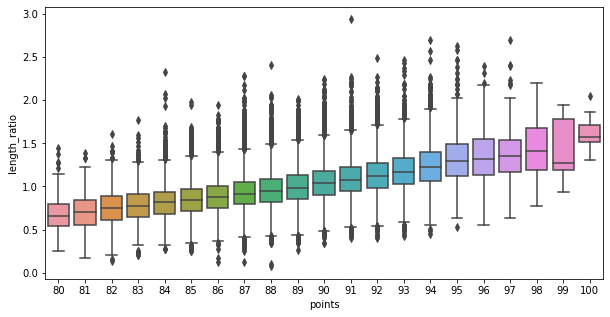

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(train['points'], train['length_ratio'])
plt.show()